<a href="https://colab.research.google.com/github/RobertSilvaAlves/projeto_2_comparacao_gastos.ipynb/blob/main/projeto_2_comparacao_gastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊 Projeto 2 — Análise Comparativa de Gastos Mensais**

Neste projeto, o objetivo é comparar os gastos entre dois meses consecutivos, identificando variações por categoria e no total, a fim de entender mudanças no comportamento financeiro.

- Dados

- Totais

- Comparações
- - Ao comparar os gastos entre os meses, observa-se que o total de despesas em Fevereiro foi menor do que em Janeiro, indicando uma redução nos gastos gerais. A categoria que apresentou a maior variação foi Transporte, com uma diminuição significativa em relação ao mês anterior.

- Gráficos

- Conclusão

In [267]:
import matplotlib

In [268]:
import matplotlib.pyplot as plt

In [269]:
# Funçõe: CALCULAR TOTAL DO MÊS

def calcular_total_mes(gastos_mes):
  return sum(gastos_mes.values())

In [244]:
# Função: COMPARAR TOTAIS DOS MESES

def comparar_totais(total_janeiro, total_fevereiro):
  if total_janeiro > total_fevereiro:
    diferenca = total_janeiro - total_fevereiro
    print(f'Janeiro teve o maior gasto: R$ {total_janeiro:.2f} Reais \n ')
    print(f'A diferença total de um mês para o outro foi de R$ {diferenca:.2f} Reais a menos \n ')
    print(f'Houve diminuição no gasto total \n ')
  elif total_fevereiro > total_janeiro:
    diferenca = total_fevereiro - total_janeiro
    print(f'Fevereiro teve o maior gasto: R$ {total_fevereiro:.2f}Reais \n ')
    print(f'A diferença total de um mês para o outro foi de R$ {diferenca:.2f} Reais a mais  \n ')
    print(f'Houve aumento no gasto total \n ')
  else:
    print('Os dois meses tiveram o mesmo total de gastos\n')

In [257]:
# Função: MAIOR VARIAÇÃO

def maior_variacao(variacoes):
    categoria, valor = max(variacoes, key=lambda x: abs(x[1]))
    print(f'\nMaior variação: {categoria} (R$ {abs(valor):.2f})')


In [310]:
# Função: VARIAÇÃO POR CATEGORIA

def variacao_por_categoria(janeiro, fevereiro):
    variacoes = []

    print('Variação por categoria:\n')

    for categoria in janeiro:
        diferenca = fevereiro[categoria] - janeiro[categoria]
        variacoes.append((categoria, diferenca))

        if diferenca > 0:
            print(f'{categoria}: aumento de R$ {diferenca:.2f}')
        elif diferenca < 0:
            print(f'{categoria}: redução de R$ {abs(diferenca):.2f}')
        else:
            print(f'{categoria}: sem variação')

    return variacoes


In [312]:
# Aqui são armazenado os dados
dados = {
    'JANEIRO':{
        'Alimentação': 800,
        'Transporte': 520,
        'Lazer': 240,
        'Moradia': 1200,
        'Financiamento': 1500
    },
    'FEVEREIRO':{
        'Alimentação': 780,
        'Transporte': 430,
        'Lazer': 280,
        'Moradia': 1200,
        'Financiamento': 1500
    }
}



# CALCULAR TOTAL DO MÊS
total_janeiro = calcular_total_mes(dados['JANEIRO'])
total_fevereiro = calcular_total_mes(dados['FEVEREIRO'])


# COMPARAR TOTAIS DOS MESES
comparar_totais(total_janeiro, total_fevereiro)

# VARIAÇÃO POR CATEGORIA
# variacao_por_categoria(dados['JANEIRO'], dados['FEVEREIRO'])
variacoes = variacao_por_categoria(dados['JANEIRO'], dados['FEVEREIRO'])
# MAIOR VARIAÇÃO
maior_variacao(variacoes)


Janeiro teve o maior gasto: R$ 4260.00 Reais 
 
A diferença total de um mês para o outro foi de R$ 70.00 Reais a menos 
 
Houve diminuição no gasto total 
 
Variação por categoria:

Alimentação: redução de R$ 20.00
Transporte: redução de R$ 90.00
Lazer: aumento de R$ 40.00
Moradia: sem variação
Financiamento: sem variação

Maior variação: Transporte (R$ 90.00)


In [274]:
import numpy as np

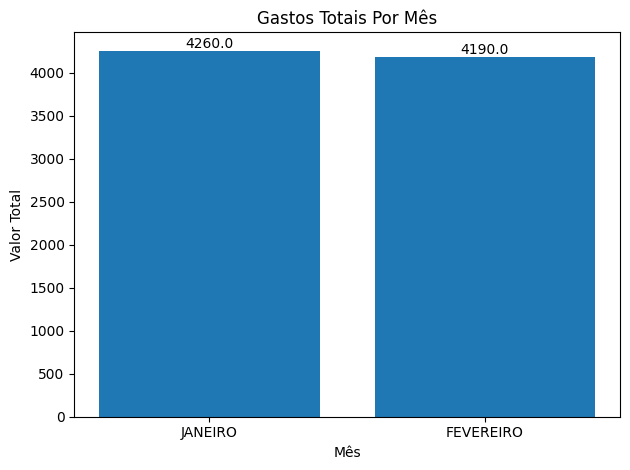

In [324]:
mes = list(dados.keys())
valores_totais = [total_janeiro, total_fevereiro]


bars = plt.bar(x = mes, height = valores_totais)

plt.title('Gastos Totais Por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total')
plt.bar_label(bars, fmt='%.1f', label_type='edge', size=10)
plt.tight_layout() # Ajustar o layout e evitar sobreposição (Escritas à cima da imagem do gráfico)

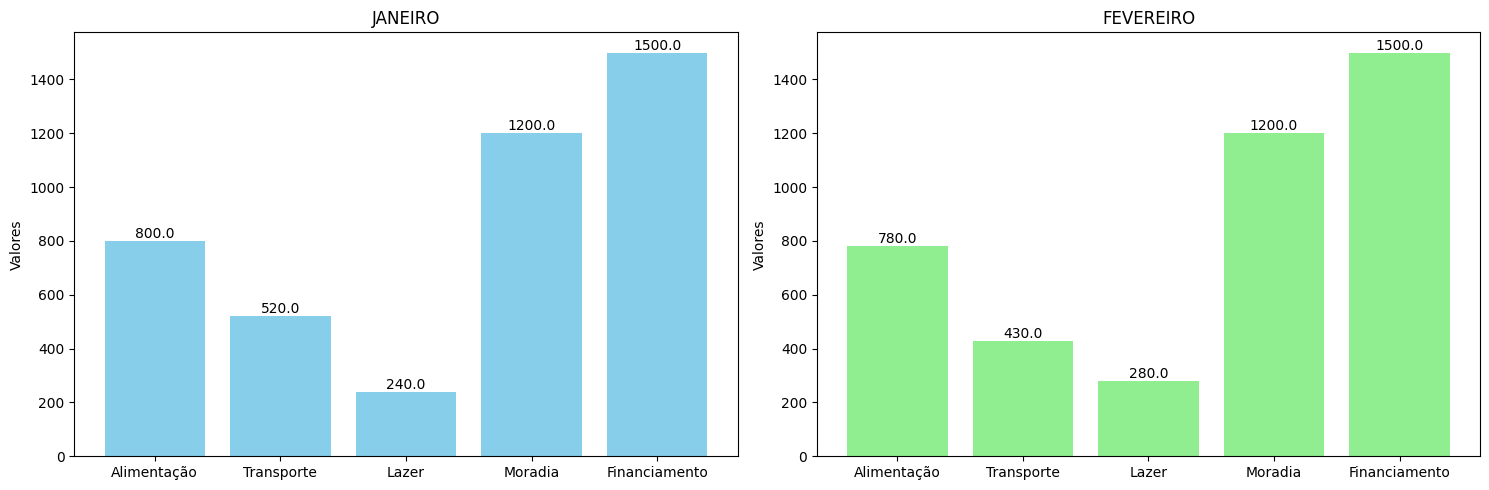

In [299]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


bars_jan = axes[0].bar(dados['JANEIRO'].keys(), dados['JANEIRO'].values(), color='skyblue')
axes[0].set_title('JANEIRO')
axes[0].set_ylabel('Valores')
axes[0].bar_label(bars_jan, fmt='%.1f', label_type='edge', size=10)

bars_feb = axes[1].bar(dados['FEVEREIRO'].keys(), dados['FEVEREIRO'].values(), color='lightgreen')
axes[1].set_title('FEVEREIRO')
axes[1].set_ylabel('Valores')
axes[1].bar_label(bars_feb, fmt='%.1f', label_type='edge', size=10)

plt.tight_layout()
plt.show()

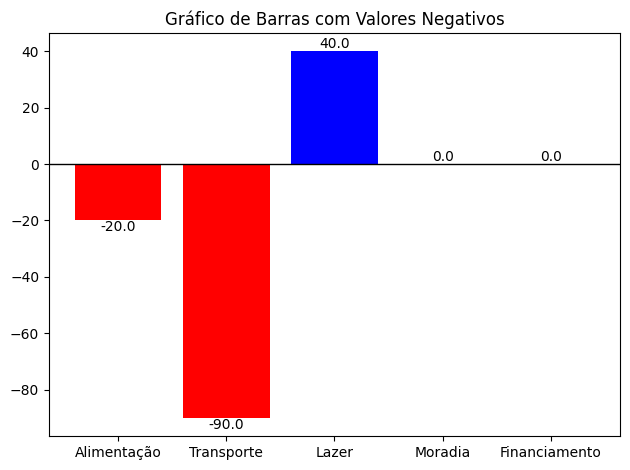

In [325]:
categoria = []
valor = []
for i in dados['JANEIRO']:
  diferenca = dados['FEVEREIRO'][i] - dados['JANEIRO'][i]
  categoria.append(i)
  valor.append(diferenca)


cores = ['red' if v < 0 else 'blue' for v in valor]

bars = plt.bar(categoria, valor, color=cores)
plt.axhline(0, color='black', linewidth=1) # Linha zero
plt.title("Gráfico de Barras com Valores Negativos")
plt.bar_label(bars, fmt='%.1f', label_type='edge', size=10)
plt.tight_layout()